## Queries - Gen3

In this notebook, we show several ways to query the Gen3 data\
Craig Lage - 21-May-21

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import lsst.afw.cameraGeom.utils as camGeomUtils
import lsst.afw.display as afwDisplay

In [2]:
# Gen3 butler
from lsst.daf.butler import Butler
dayObs = 20210525
expId = 2021052500170
butler = Butler('/repo/main', collections="LATISS/raw/all")
mData = butler.get('raw.metadata', detector=0, exposure=expId)

In [3]:
for key in mData.keys():
    print(key, mData[key])


SIMPLE True
EXTEND True
COMMENT ---- Geometry from Camera ----
ORIGIN LSST DM Header Service
TIMESYS TAI
DATE 2021-05-26T00:01:18.726
DATE-OBS 2021-05-26T00:01:50.859
DATE-BEG 2021-05-26T00:01:50.859
DATE-END 2021-05-26T00:01:53.096
MJD 59360.0009111757
MJD-OBS 59360.0012830949
MJD-BEG 59360.0012830949
MJD-END 59360.0013089768
OBSID AT_O_20210525_000170
GROUPID 2021-05-26T00:01:50.593
IMGTYPE OBJECT
BUNIT adu
FACILITY Vera C. Rubin Observatory
TELESCOP LSST AuxTelescope
INSTRUME LATISS
OBSERVER LSST
OBS-LONG -70.749417
OBS-LAT -30.244639
OBS-ELEV 2663.0
OBSGEO-X 1818938.94
OBSGEO-Y -5208470.95
OBSGEO-Z -3195172.08
RA 163.268894583333
DEC -20.6282061111111
RASTART 163.278062289139
DECSTART -20.6347247913007
RAEND 163.278062814275
DECEND -20.6346397510504
ROTPA 6.9386833445139e-310
ROTCOORD sky
HASTART 0.653581406607424
ELSTART 77.1463120563712
AZSTART -45.2896710450295
AMSTART 1.02568040909033
HAEND 0.654907522368712
ELEND 77.1334446056571
AZEND -45.3551813180093
AMEND 1.0257301837126
I

In [4]:
exp = butler.get('raw', detector=0, exposure=expId)

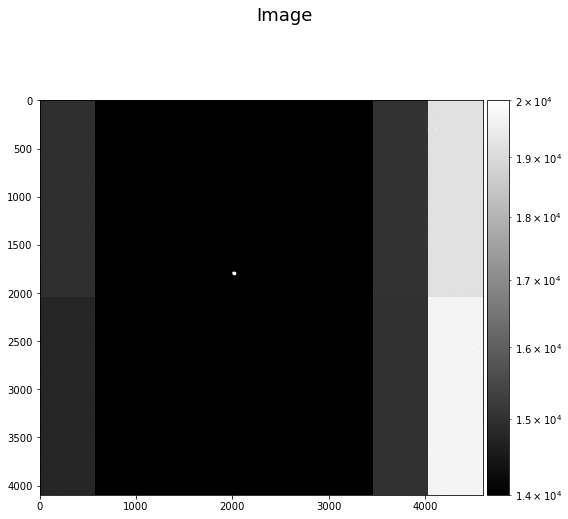

In [5]:
# Look at the data with matplotlib
# The raw data doesn't look very good, because of the large pedestal of about 15,000 ADU
from matplotlib.colors import LogNorm
# Now let's look at ithem
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

plt.figure(figsize=(8,8))
plt.suptitle(f"Image",fontsize=18)
arr = exp.image.array
img = plt.imshow(arr, norm=LogNorm(vmin=14000, vmax=20000), interpolation='Nearest', cmap='gray')
colorbar(img)
plt.tight_layout(h_pad=1)
#plt.savefig(REPO_DIR+"/plots/NGC4755_17Feb21.pdf")

In [6]:
dayObs = 20210602
expId = 2021060200050
butler = Butler('/repo/main', collections="LSSTComCam/raw/all")
mData = butler.get('raw.metadata', detector=4, exposure=expId)

In [7]:
for key in mData.keys():
    print(key, mData[key])


SIMPLE True
EXTEND True
COMMENT ---- Checksums ----
ORIGIN LSST DM Header Service
TIMESYS TAI
DATE 2021-06-02T21:38:57.411
DATE-OBS 2021-06-02T21:39:16.324
DATE-BEG 2021-06-02T21:39:16.324
DATE-END 2021-06-02T21:39:31.755
MJD 59367.9020533674
MJD-OBS 59367.902272272
MJD-BEG 59367.902272272
MJD-END 59367.9024508631
OBSID CC_O_20210602_000050
GROUPID flats
IMGTYPE FLAT
BUNIT adu
FACILITY Vera C. Rubin Observatory
TELESCOP Simonyi Survey Telescope
INSTRUME ComCam
OBSERVER LSST
OBS-LONG -70.749417
OBS-LAT -30.244639
OBS-ELEV 2663.0
OBSGEO-X 1818938.94
OBSGEO-Y -5208470.95
OBSGEO-Z -3195172.08
RA 174.073470958891
DEC -34.0
RASTART 145.253593778587
DECSTART -30.0478545811404
RAEND 145.329347135546
DECEND -30.0477637159524
ROTPA 0.0
ROTCOORD sky
HASTART 0.0
ELSTART 89.9027180089505
AZSTART -5e-324
AMSTART 0.0
HAEND 0.0
ELEND 89.9027180089505
AZEND -5e-324
AMEND 0.0
TRACKSYS RADEC
RADESYS ICRS
FOCUSZ 2000.0
OBJECT slew_icrs
CAMCODE CC
CONTRLLR O
DAYOBS 20210602
SEQNUM 50
TESTTYPE FLAT
TSTAND N

In [8]:
exp = butler.get('raw', detector=4, exposure=expId)

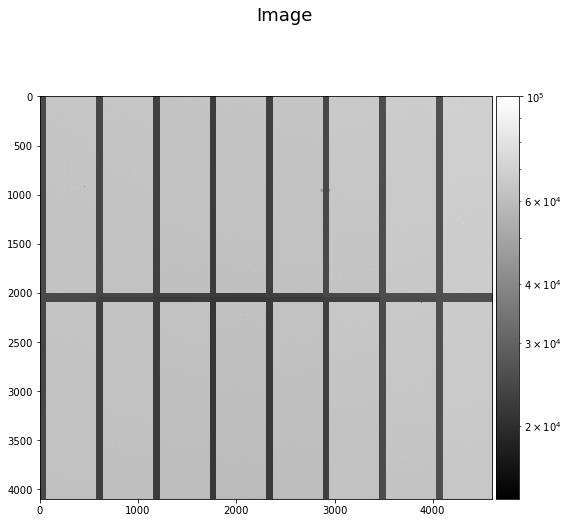

In [9]:
# Look at the data with matplotlib
# The raw data doesn't look very good, because of the large pedestal of about 15,000 ADU
from matplotlib.colors import LogNorm
# Now let's look at ithem
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

plt.figure(figsize=(8,8))
plt.suptitle(f"Image",fontsize=18)
arr = exp.image.array
img = plt.imshow(arr, norm=LogNorm(vmin=14000, vmax=100000), interpolation='Nearest', cmap='gray')
colorbar(img)
plt.tight_layout(h_pad=1)
#plt.savefig(REPO_DIR+"/plots/NGC4755_17Feb21.pdf")